In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_excel("school_data.xls" , skiprows = 2)

In [3]:
df.head()

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,CULTIVATION,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,ENGINEER,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,OTHERS,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,NaN,NaN,NaN,NaN,NaN,SIX,SEVEN,EIGHT,NINE,TEN,...,SIX,SEVEN,EIGHT,NINE,TEN,SIX,SEVEN,EIGHT,NINE,TEN
1,2016.0,BARGUNA,AMTALI,100003.0,DAKSHIN KATHALIA TAZEM ALI SECONDARY SCHOOL,90,70,50,30,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.0,BARGUNA,AMTALI,100009.0,LOCHA JUUNIOR HIGH SCHOOL,25,16,15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN
3,2016.0,BARGUNA,AMTALI,100011.0,AMTALI A.K. PILOT HIGH SCHOOL,69,54,62,62,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.0,BARGUNA,AMTALI,100012.0,CHOTONILGONG HIGH SCHOOL,45,34,32,5,21,...,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,3


In [4]:
def convert_data(path):
    import pandas as pd
    import numpy as np
    
    d = pd.read_excel(path,header = None,  
                                   skiprows = 4, usecols = list(range(0, 10)))
    d.columns = ['YEAR','DISTRICT','UPAZILA/THANA','EIIN','INSTITUTE NAME','SIX',
                          'SEVEN','EIGHT','NINE','TEN']
    d["OCCUPATION"] = "cultivation"
    list_of_occupation = [{"worker_six": [x for x in range(15) if x not in range(5,10)]},
                      {"businessman":[x for x in range(20) if x not in range(5,15)]},
                     {"small business": [x for x in range(25) if x not in range(5,20)]},
                     {"government service": [x for x in range(30) if x not in range(5,25)]},
                     {"private service": [x for x in range(35) if x not in range(5,30)]},
                     {"doctor": [x for x in range(40) if x not in range(5,35)]}, 
                     {"lawyer": [x for x in range(45) if x not in range(5,40)]},
                     {"teacher": [x for x in range(50) if x not in range(5,45)]},
                     {"fisherman": [x for x in range(55) if x not in range(5,50)]},
                     {"tati": [x for x in range(60) if x not in range(5,55)]},
                     {"kamar-kumar": [x for x in range(65) if x not in range(5,60)]},
                     {"expatriate": [x for x in range(70) if x not in range(5,65)]},
                     {"engineer": [x for x in range(75) if x not in range(5,70)]},
                     {"others": [x for x in range(80) if x not in range(5,75)]} ]
    
    for item in list_of_occupation:
        type = list(item.items())[0][0]
        cols = list(item.items())[0][1]
        df_new = pd.read_excel(path, skiprows = 4, usecols = cols, header = None)
        df_new.columns = ['YEAR','DISTRICT','UPAZILA/THANA','EIIN','INSTITUTE NAME','SIX',
                          'SEVEN','EIGHT','NINE','TEN']
        df_new["OCCUPATION"] = type
        d =pd.concat([d, df_new])
    
    return d

In [36]:
latest_data = convert_data("school_data.xls")

Wall time: 1min 5s


In [6]:
latest_data.head()

,YEAR,DISTRICT,UPAZILA/THANA,EIIN,INSTITUTE NAME,SIX,SEVEN,EIGHT,NINE,TEN,OCCUPATION
0,2016,BARGUNA,AMTALI,100003,DAKSHIN KATHALIA TAZEM ALI SECONDARY SCHOOL,90.0,70.0,50.0,30.0,25.0,cultivation
1,2016,BARGUNA,AMTALI,100009,LOCHA JUUNIOR HIGH SCHOOL,25.0,16.0,15.0,NaN,NaN,cultivation
2,2016,BARGUNA,AMTALI,100011,AMTALI A.K. PILOT HIGH SCHOOL,69.0,54.0,62.0,62.0,52.0,cultivation
3,2016,BARGUNA,AMTALI,100012,CHOTONILGONG HIGH SCHOOL,45.0,34.0,32.0,5.0,21.0,cultivation
4,2016,BARGUNA,AMTALI,100014,SHAKHRIA HIGH SCHOOL,25.0,25.0,20.0,25.0,20.0,cultivation


In [7]:
col_names = [col.lower().replace("/", " ").split(" ", 1)[0] for col in latest_data.columns ]
latest_data.columns = col_names


In [8]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289185 entries, 0 to 19278
Data columns (total 11 columns):
year          289185 non-null int64
district      289185 non-null object
upazila       289185 non-null object
eiin          289185 non-null int64
institute     289185 non-null object
six           119427 non-null float64
seven         117811 non-null float64
eight         115688 non-null float64
nine          105887 non-null float64
ten           102283 non-null float64
occupation    289185 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 26.5+ MB


In [9]:
latest_data.fillna(0, inplace = True)


In [10]:
df = latest_data.copy()

In [11]:
df['total'] = df[['six', 'seven', 'eight', 'nine', 'ten']].sum(axis = 1)


### data visualization

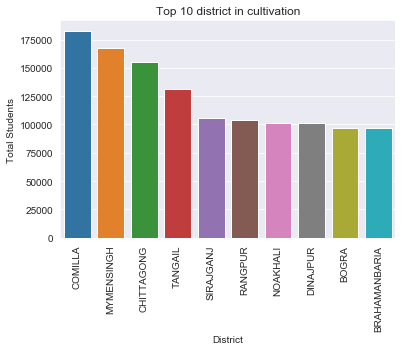

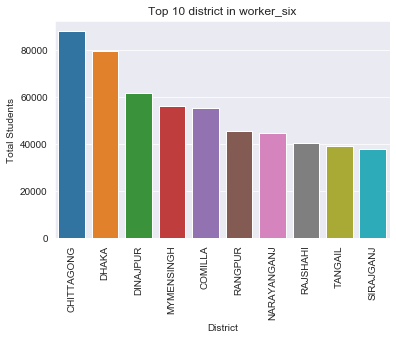

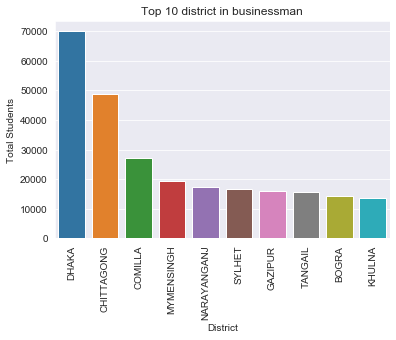

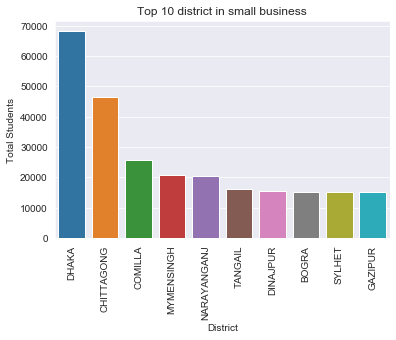

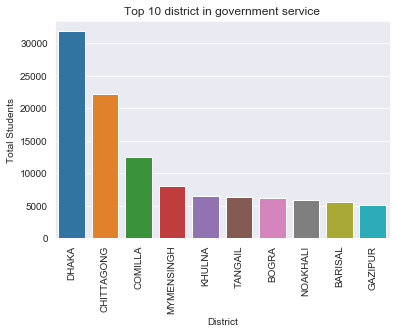

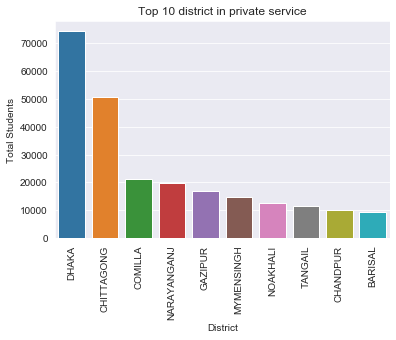

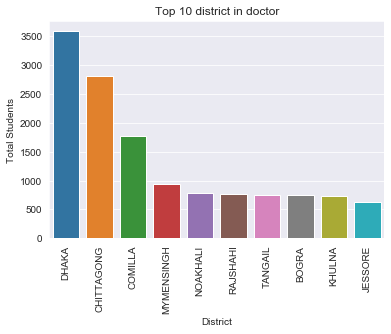

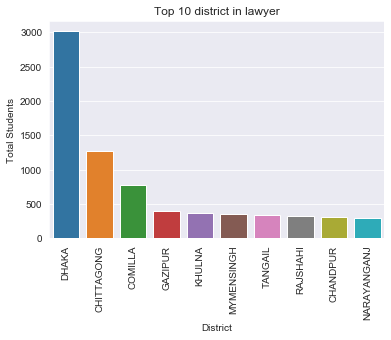

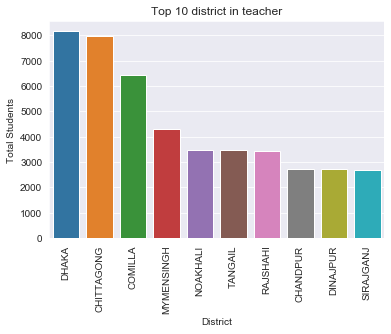

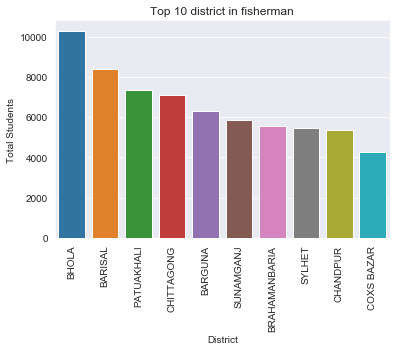

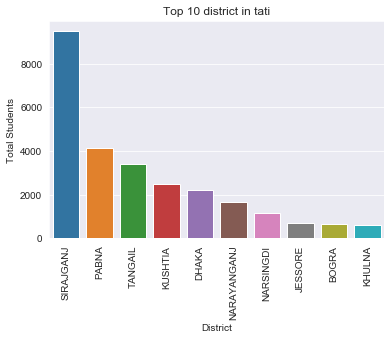

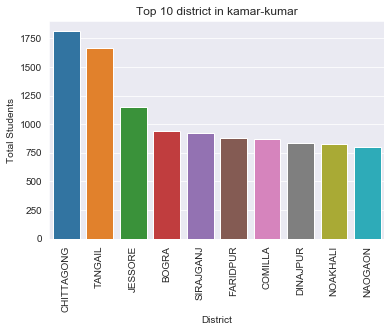

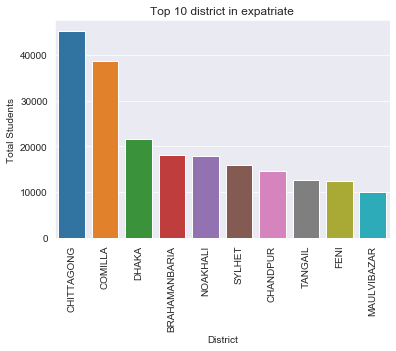

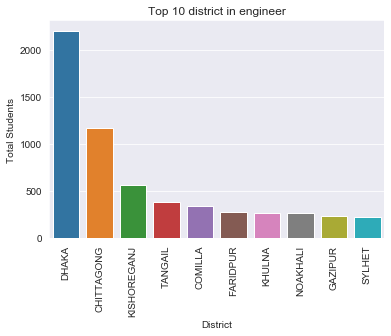

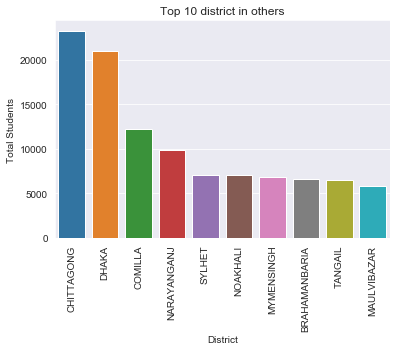

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

occupations = list(df['occupation'].unique())

for occupation in occupations:
    data = df[df["occupation"] == occupation]
    tati_data_by_top10_district = data.groupby("district")["total"].sum().sort_values(ascending = False)[:10]
    tati_data_by_top10_district = tati_data_by_top10_district.to_frame()
    tati_data_by_top10_district.reset_index(inplace = True)

    sns.set_style("darkgrid")
    sns.barplot(data = tati_data_by_top10_district, x = "district", y=  "total")
    plt.ylabel("Total Students")
    plt.xlabel("District")
    plt.title("Top 10 district in {}".format(occupation))
    plt.xticks(rotation=90)
    plt.show()



### top 10 school with most student ratio of each occupation

In [13]:
new_df = df.copy()
new_df.shape

(289185, 12)

In [14]:
total_students = new_df.groupby("eiin")['total'].sum()
total = list(new_df['total'])
eiin = list(new_df['eiin'])
eiin_and_total = new_df[['eiin', 'total']]
percentage = []
for indx, item in enumerate(eiin):
    if (total_students[item] != 0):
        p = round((total[indx] /total_students[item])*100, 2)
        percentage.append(p)
    else:
        percentage.append(0)


In [15]:
new_df['percentage'] = percentage

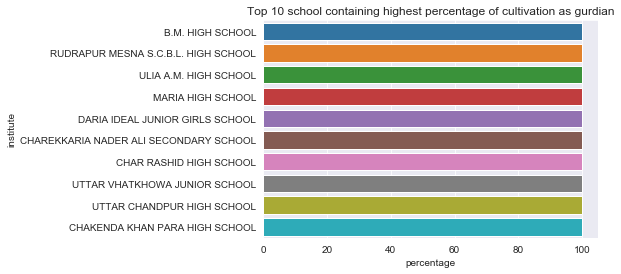

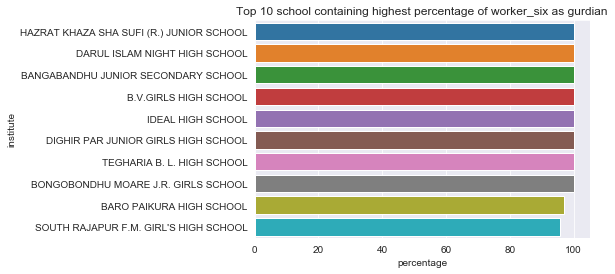

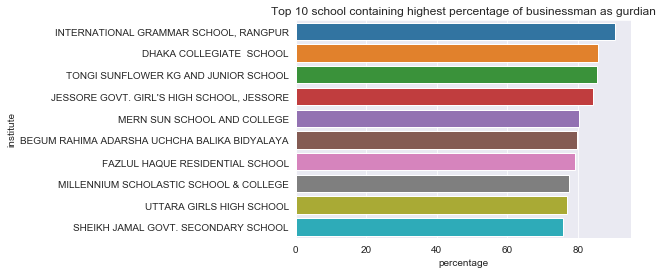

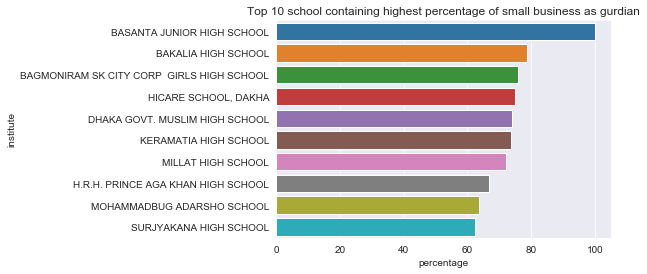

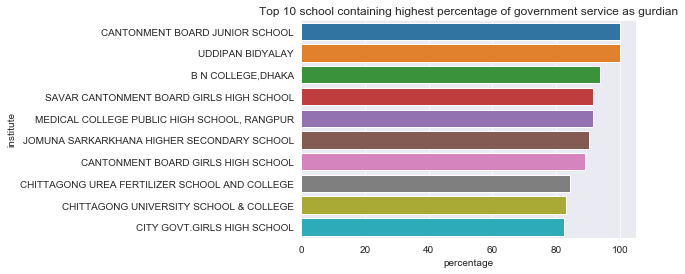

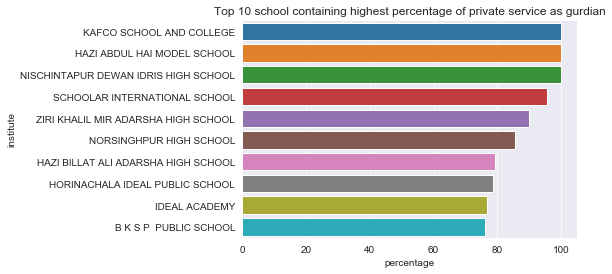

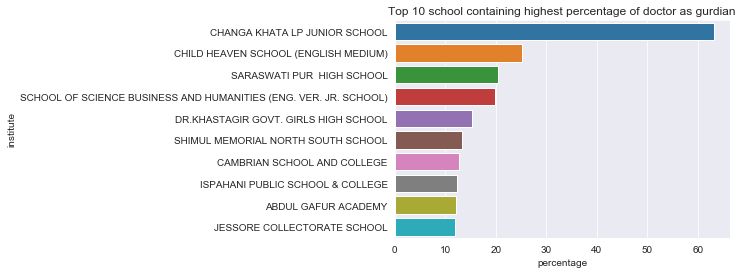

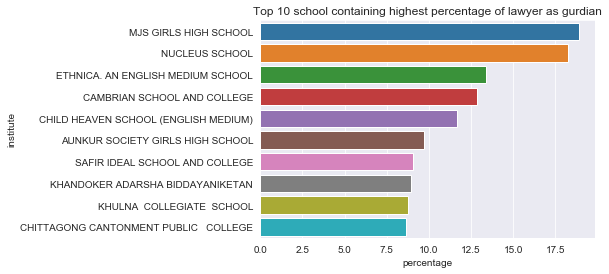

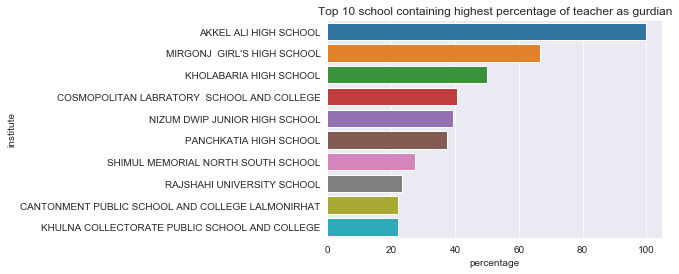

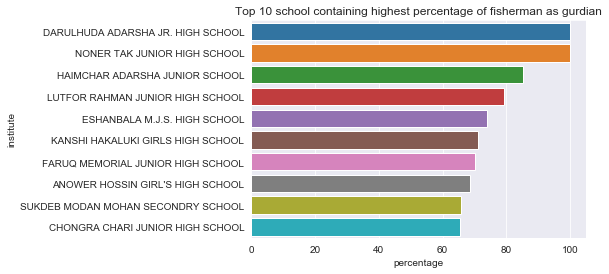

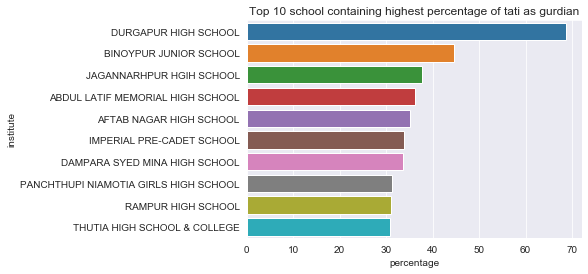

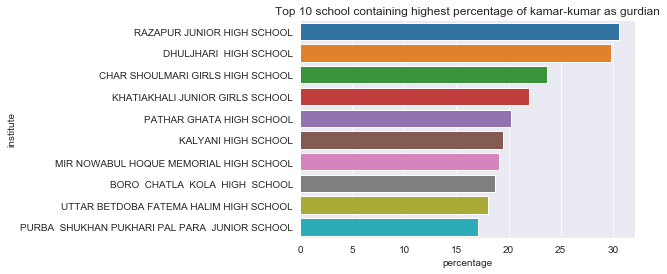

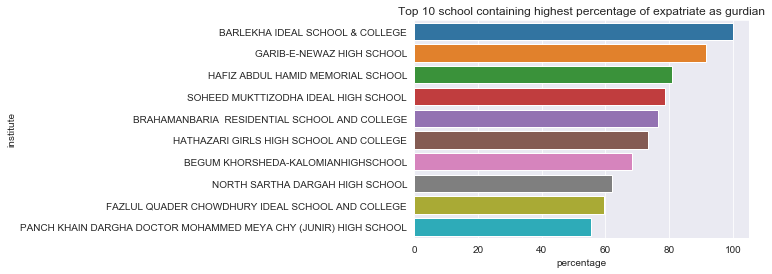

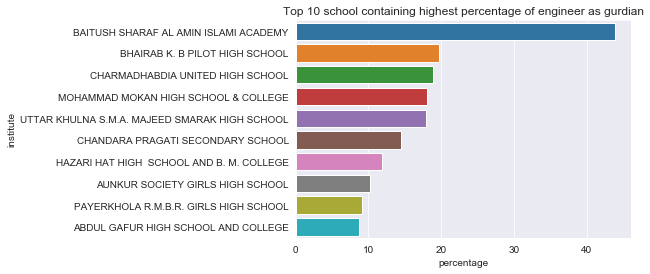

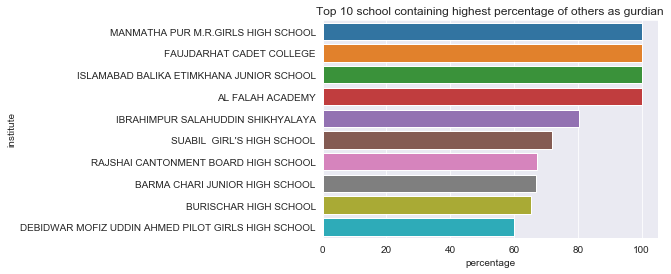

In [20]:
for occupation in occupations:
    df_institute_percentage = new_df[new_df['occupation'] == occupation].sort_values('percentage', ascending = False)[:10]
    sns.barplot(data = df_institute_percentage, y= 'institute', x = 'percentage')
    plt.title("Top 10 school containing highest percentage of {} as gurdian".format(occupation))
    plt.show()